# Homework 03


## Part 1 - Questions

### Question 1: 

Who are the top 10 streamers based on followers?

* Who (population): inverstor
* What (subject, discipline): entertainment business
* Where (location): media channels
* When (snapshot, longitudinal): snapshot
* How much data do you need to do the analysis/work: 1000

### Question 2: 

Which language does the streamers use most?

* Who (population): investor
* What (subject, discipline): entertainment business
* Where (location): media channels
* When (snapshot, longitudinal): snapshot
* How much data do you need to do the analysis/work: 1000

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

* People who want to invest in the Esports scene.
* Entertainment, media and business relevant articles.

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: Top Streamers on Twitch
2. Link to Data: https://www.kaggle.com/aayushmishra1512/twitchdata/version/3
3. Source / Origin: 
	* Author or Creator: Aayush Mishra
	* Publication Date: 2020-08-23
	* Publisher: Kaggle
	* Version or Data Accessed: Version 3
4. License: CC0: Public Domain
5. Can You Use this Data Set for Your Intended Use Case?
Yes, this data set contains top 1000 streamers on Twitch with data of number of followers and language, etc.

## Format




### Overview

* Format: CSV File
* Size: 82KB
* Number of Records: 1000 rows (without header)



### Sample of Data




In [42]:
# TODO show a few lines of data from the actual file

# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
with open('../data/raw/twitchdata-update.csv', 'r') as f:
    lines = f.readlines()
    for i in range(4):
        line = lines[i]
        print(line)

Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language

xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English

summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English

Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese




### Fields or Column Headers

* Field/Column 1: Channel - string
* Field/Column 2: Watch time(Minutes) - int
* Field/Column 3: Stream time(minutes) - int
* Field/Column 4: Peak viewers - int
* Field/Column 5: Average viewers - int
* Field/Column 6: Followers - int
* Field/Column 7: Followers gained - int
* Field/Column 8: Views gained - int
* Field/Column 9: Partnered - boolean
* Field/Column 10: Mature - boolean
* Field/Column 11: Language - string

## Part 3 - Extract / Transform

TODO describe your process for extracting, transforming, cleaning your incoming data:

* what columns you'll be using (extracting) from your dataset
* how you're planning to convert the data into analogous python types / how you'll deal with type issues (for example, you may want a column that's numeric, but the data contains a label, such as 4 months) 
* any other kind of cleaning (_normalizing_ data, filling in missing values, etc.) that you'll have to perform


In [44]:
# TODO write code here!
# To answer my questions,
# I would like to extrct three columns, which are channel(string), followers(int), and language(string).
# I transform the followers from string to in type.
# Besides, through scanning, there is no missing value. I can also directly convert types without issue.

import csv

with open('../data/raw/twitchdata-update.csv', 'r') as f:
    data = [(line['Channel'], int(line['Followers']), line['Language']) for line in csv.DictReader(f)]

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [67]:
# TODO: copy and paste your results here
import numpy as np
import statistics

channel_name, number_of_followers, language_used = map(list, zip(*data))
followers_mean = mean(number_of_followers)
followers_mode = mode(number_of_followers)
followers_median = median(number_of_followers)
print(f'Mean: {followers_mean}')
print(f'Mode: {followers_mode}')
print(f'Median: {followers_median}')

Mean: 570054.068
Mode: 3246298
Median: 318063.0


#### Dispersion

In [68]:
# TODO: copy and paste your results here
st_dev = np.std(number_of_followers)
variance = np.var(number_of_followers)
print(f'Variance: {variance}')
print(f'Standard deviation: {st_dev}')

Variance: 646433785192.3855
Standard deviation: 804011.0603669488


#### Outliers


In [77]:
# TODO: copy and paste your results here
sorted(number_of_followers)
q1, q3= np.percentile(number_of_followers,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
outliers = list(filter(lambda x: x < lower_bound or x > upper_bound, number_of_followers))
print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')
print(f'Outliers: {outliers}')

Lower bound: -510132.75
Upper bound: 1305011.25
Outliers: [3246298, 5310163, 1767635, 3944850, 8938903, 1563438, 4074287, 3530767, 2607076, 5265659, 2666382, 4487489, 5751354, 3983847, 2911316, 2786162, 3445134, 2411995, 4450718, 3795667, 1792625, 1724316, 2401580, 4115083, 6726893, 1379123, 3135667, 1894953, 1878416, 2942212, 1409120, 2035180, 1478270, 1607134, 1659108, 1660204, 1308165, 2355063, 1801697, 1501197, 3611359, 4520305, 5367605, 2641880, 7744066, 1549722, 2601858, 1796619, 2138294, 2009972, 1461767, 2149306, 1327059, 1865296, 1707804, 2652018, 1852272, 1739112, 1372290, 1422862, 1519266, 1748928, 1701314, 2716270, 2951980, 1363222, 1536757, 1472104, 1476226, 3558217, 1717150, 1681884, 1448018, 1585519, 1389835, 1681615, 3000509, 1340283, 1433703, 1651212, 1751290, 1869993, 1368076, 1874932, 1677690, 2137521, 1474090, 2115596, 1866339]


#### Other


In [118]:
# TODO: copy and paste your results here
my_dict = dict(zip(channel_name, number_of_followers))
top10_channel = sorted(my_dict, key=my_dict.get, reverse=True)[:10]
top10_value = []
for i in top10_channel:
    value = my_dict.get(i)
    top10_value.append(value)
top10 = dict(zip(top10_channel, top10_value))
print(top10)

{'Tfue': 8938903, 'shroud': 7744066, 'Myth': 6726893, 'Rubius': 5751354, 'pokimane': 5367605, 'summit1g': 5310163, 'TimTheTatman': 5265659, 'dakotaz': 4520305, 'Riot Games (riotgames)': 4487489, 'DrDisrespect': 4450718}


###  Analysis on Categorical Data

#### Frequency

In [87]:
# TODO: copy and paste your results here

# stores the frequency of elements
freq = {} 
counting = [freq.update({x: language_used.count(x)}) for x in language_used]
print(freq)

{'English': 485, 'Portuguese': 61, 'Spanish': 68, 'German': 49, 'Korean': 77, 'French': 66, 'Russian': 74, 'Japanese': 10, 'Chinese': 30, 'Czech': 6, 'Turkish': 22, 'Italian': 17, 'Polish': 12, 'Thai': 11, 'Arabic': 5, 'Slovak': 1, 'Other': 1, 'Hungarian': 2, 'Greek': 1, 'Finnish': 1, 'Swedish': 1}


#### Unique Values

In [88]:
# TODO: copy and paste your results here
list_set = set(language_used)
unique_list = (list(list_set))
for x in unique_list:
        print(x)

Swedish
Turkish
Polish
Czech
Japanese
Korean
English
Russian
German
French
Slovak
Finnish
Portuguese
Thai
Arabic
Spanish
Chinese
Italian
Greek
Other
Hungarian


## Part 5 - Visualizations



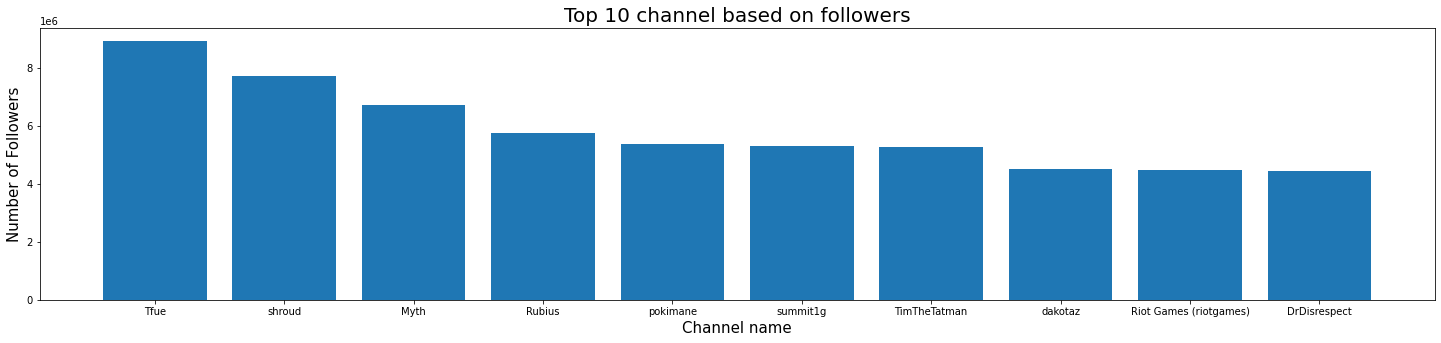

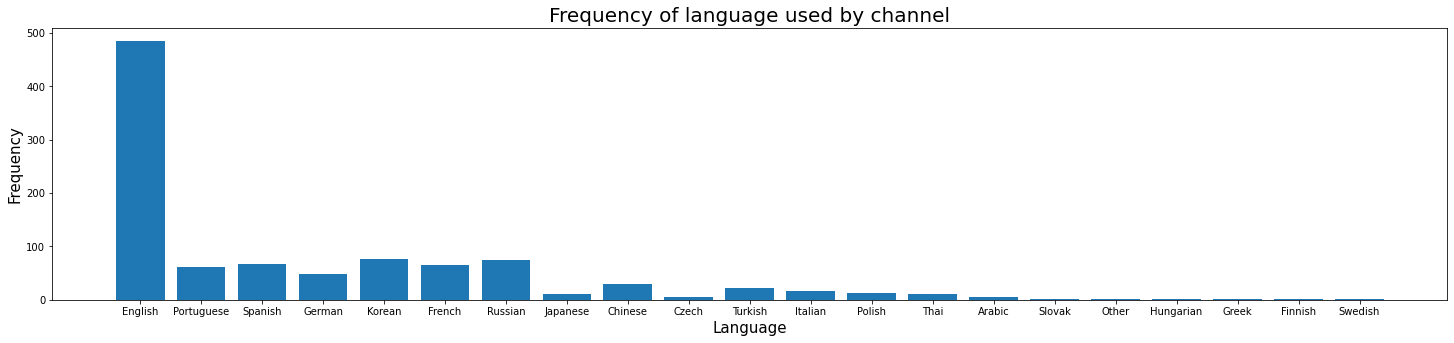

In [136]:
# TODO: add visualizations here
import matplotlib.pyplot as plt

# Top 10 channel based on followers

keys = top10.keys()
values = top10.values()
plt.figure(figsize=(25,5))
plt.bar(keys, values)
plt.xlabel('Channel name', fontsize=15) 
plt.ylabel('Number of Followers', fontsize=15) 
plt.title("Top 10 channel based on followers", fontsize=20)
plt.show()

# Frequency of language used by channel
keys = freq.keys()
values = freq.values()
plt.figure(figsize=(25,5))
plt.bar(keys, values)
plt.xlabel('Language', fontsize=15) 
plt.ylabel('Frequency', fontsize=15) 
plt.title("Frequency of language used by channel", fontsize=20)
plt.show()

TODO Describe the visualizations in the previous cell


## Part 6 - Conclusion

TODO: write your conclusion here (interpret results of calculations; does it help answer your original questions?)

#### Question 1: 
Who are the top 10 streamers based on followers?
#### Answer 1:
I could find out the top 10 streamers by first extracting the columns of channel and followers and make them into a dictionary. And sort the dictionary based on the values in decreasing order and find out the first ten. So we can find the top 10 streamers are: {'Tfue': 8938903, 'shroud': 7744066, 'Myth': 6726893, 'Rubius': 5751354, 'pokimane': 5367605, 'summit1g': 5310163, 'TimTheTatman': 5265659, 'dakotaz': 4520305, 'Riot Games (riotgames)': 4487489, 'DrDisrespect': 4450718}.

#### Question 2: 
Which language does the streamers use most?
#### Answer 2: 
I could find out the most frequent used language by first extracting the column of language into a list and calculate the frequency of each language in the list. And it turns out that the streamers mostly use English.

## Part 7 - Heights and Weights

TODO: add your code cells below this!

No missing value.
[[1.         0.76046219]
 [0.76046219 1.        ]]


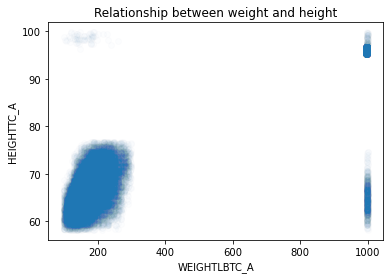

In [142]:
# field names for height (in inches): HEIGHTTC_A
# field names for weight (in pounds): WEIGHTLBTC_A
import numpy as np
import matplotlib.pyplot as plt

with open('../data/raw/adult19.csv','r') as f:
    reader = list(csv.reader(f))
weight = []
height = []
missing_value = False
for row in reader[1:]:
    if np.isnan(int(row[50])) or np.isnan(int(row[49])):
        missing_value = True
    else:
        weight.append(int(row[49]))
        height.append(int(row[50]))

if missing_value is True:
    print("There are missing values.")
else:
    print("No missing value.")

arr = np.array([weight, height]) 
print(np.corrcoef(arr))

weight_new = [w + np.random.uniform(-0.8, 0.8) for w in weight]
heights_new = [h + np.random.uniform(-0.8, 0.8) for h in height]
plt.scatter(weight_new, heights_new, alpha=0.01)
plt.xlabel('WEIGHTLBTC_A')
plt.ylabel('HEIGHTTC_A') 
plt.title("Relationship between weight and height")
plt.show()